#Machine Learning 101 course - Lesson 4
##Practical Programming Experiences on Linear Regression Models

Created by: Thien X. Phan 

Data Science & Machine Learning Team: Phong Nguyen, Thien X. Phan, Hiep Nguyen

Date: 2017-12-10

##1. Simple Linear Regression 

###Dataset: HeadBrain (Head size Cm^3^, Brain weight Cm^3^,...)

###1.1. Import and explore the data 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('./data/headbrain.csv')
data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [2]:
data.describe()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


###1.2. Build and train the Simple Linear Regression model 

In [3]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
print(X)

[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497 3082 3248 3358
 3803 3566 3145 3503 3571 3724 3615 3203 3609 3561 3979 3533 3689 3158
 4005 3181 3479 3642 3632 3069 3394 3703 3165 3354 3000 3687 3556 2773
 3058 

In [5]:
print(Y)

[1530 1297 1335 1282 1590 1300 1400 1255 1355 1375 1340 1380 1355 1522
 1208 1405 1358 1292 1340 1400 1357 1287 1275 1270 1635 1505 1490 1485
 1310 1420 1318 1432 1364 1405 1432 1207 1375 1350 1236 1250 1350 1320
 1525 1570 1340 1422 1506 1215 1311 1300 1224 1350 1335 1390 1400 1225
 1310 1560 1330 1222 1415 1175 1330 1485 1470 1135 1310 1154 1510 1415
 1468 1390 1380 1432 1240 1195 1225 1188 1252 1315 1245 1430 1279 1245
 1309 1412 1120 1220 1280 1440 1370 1192 1230 1346 1290 1165 1240 1132
 1242 1270 1218 1430 1588 1320 1290 1260 1425 1226 1360 1620 1310 1250
 1295 1290 1290 1275 1250 1270 1362 1300 1173 1256 1440 1180 1306 1350
 1125 1165 1312 1300 1270 1335 1450 1310 1027 1235 1260 1165 1080 1127
 1270 1252 1200 1290 1334 1380 1140 1243 1340 1168 1322 1249 1321 1192
 1373 1170 1265 1235 1302 1241 1078 1520 1460 1075 1280 1180 1250 1190
 1374 1306 1202 1240 1316 1280 1350 1180 1210 1127 1324 1210 1290 1100
 1280 1175 1160 1205 1163 1022 1243 1350 1237 1204 1090 1355 1250 1076
 1120 

In [11]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [12]:
m = len(X)
numer = 0 
denom = 0 
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2 
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1, b0)


0.263429339489 325.573421049


####=> Our built (trained) Linear Regression model: Y = 325.573421049 + 0.263429339489 * X 

###1.3. Visualize the data values and the Regression Line

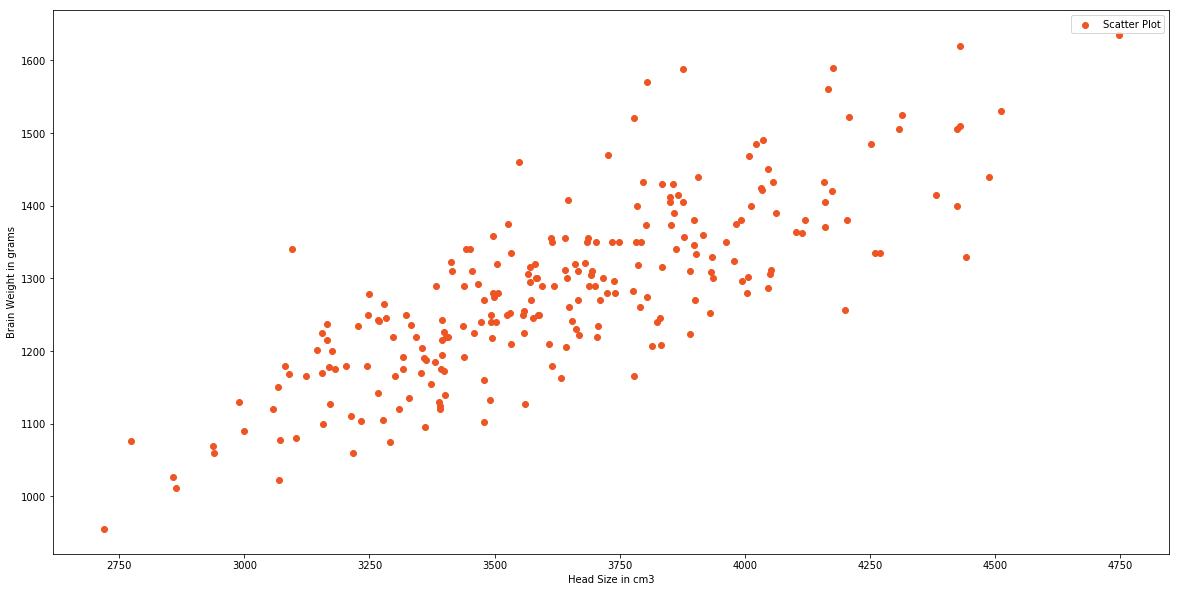

In [20]:
#plotting values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y 
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#Plot Scatter points 
plt.scatter(X, Y, c ='#ef5423', label = 'Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

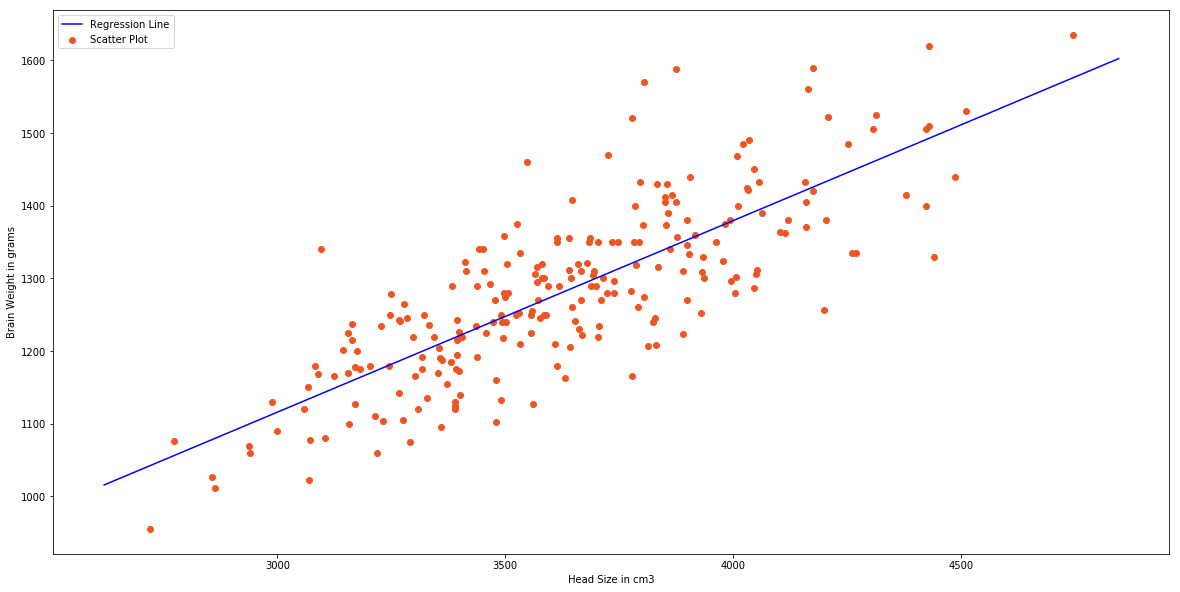

In [21]:
#plotting values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y 
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#Plot Scatter points 
plt.scatter(X, Y, c ='#ef5423', label = 'Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')

#Plot line
plt.plot(x, y, color='b', label='Regression Line')
plt.legend()
plt.show()

###1.4. Calculate Root Mean Square Error (RMSE)

In [12]:
#calculate Root Mean Squares Error
rmse = 0 
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213784


###Calculate Coefficient of Determination (R^2^ Score)

In [13]:
#Find R^2 Score
ss_t = 0 
ss_r = 0 
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.639311719957


##1.5. Scikit-Learn: Implementation of the above Simple Linear Regression using SciKit-Learn 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in scikit learn 
X = X.reshape((m,1))


In [24]:
#Creating model 
reg = LinearRegression()

In [25]:
#Fitting training data 
reg = reg.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [26]:
#Y Prediction
Y_pred = reg.predict(X)

In [27]:
#Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213784
0.639311719957


##Well Done!

####(Next lesson: Multiple Linear Regression)